In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
import os

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the dataset
data_path = os.path.join('..', 'data', 'ML471_S4_Datafile_Practice.csv')
df = pd.read_csv(data_path)

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close,Volume,Close_diff,SMA_10,SMA_30,SES
Date,,,,,,,,,
2006-01-31,34.854000,35.166500,34.524500,34.818000,3777774.800,NaN,NaN,NaN,34.818000
2006-02-28,35.901579,36.162105,35.671579,35.908947,4196577.053,1.090947,NaN,NaN,34.818000
2006-03-31,34.624783,34.889130,34.453478,34.671304,3952055.652,-1.237643,NaN,NaN,35.036189
2006-04-30,34.625263,34.901053,34.386316,34.687368,3888881.000,0.016064,NaN,NaN,34.963212
2006-05-31,34.499545,34.672273,34.185000,34.386818,4088439.591,-0.300550,NaN,NaN,34.908044


In [3]:
# Seasonal Naïve Forecast
# Repeating the values from the same month in the previous year (12-month shift)
df['Seasonal_Naive_Forecast'] = df['Close'].shift(12)

# Display tail to see predictions
df.tail()

,Open,High,Low,Close,Volume,Close_diff,SMA_10,SMA_30,SES,Seasonal_Naive_Forecast
Date,,,,,,,,,,
2016-08-31,117.204783,117.674783,116.612174,117.066087,9.449653e+06,-5.738413,120.391970,104.761967,119.126668,98.047143
2016-09-30,115.993809,116.637143,115.435238,115.966190,9.787488e+06,-1.099896,120.698039,105.412459,118.714552,96.824286
2016-10-31,113.458095,113.986667,112.646191,113.147143,9.973866e+06,-2.819048,120.308526,105.871205,118.164879,105.590909
2016-11-30,116.473810,117.409524,115.911905,116.887619,9.863482e+06,3.740476,120.189131,106.365173,117.161332,112.905500
2016-12-31,121.697143,122.306667,121.220000,121.731429,1.001308e+07,4.843810,120.526673,107.042713,117.106589,117.042273


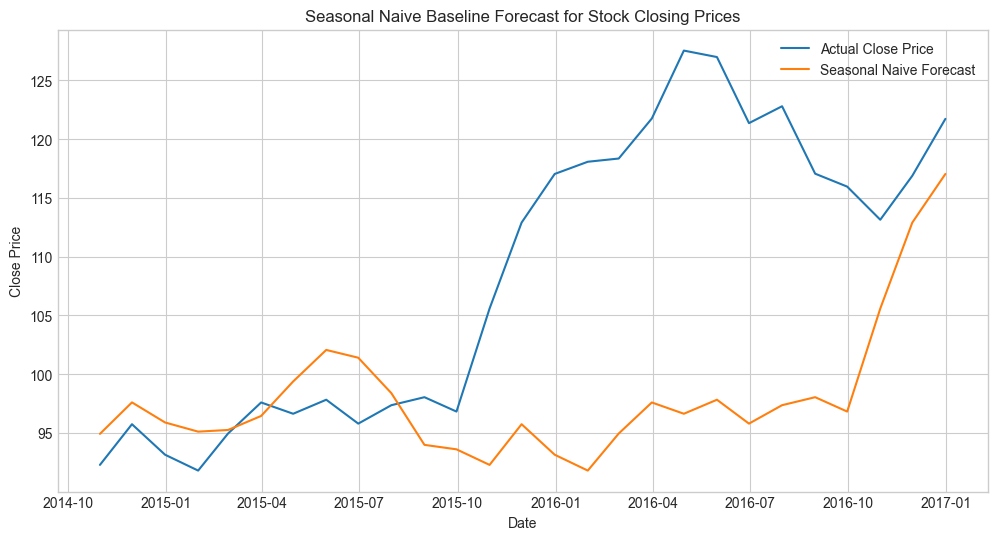

In [4]:
# Train/Test Split (80/20)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Visualization and Comparison for the Test Period
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual Close Price', color='tab:blue')
plt.plot(test.index, test['Seasonal_Naive_Forecast'], label='Seasonal Naive Forecast', color='tab:orange')

plt.title('Seasonal Naive Baseline Forecast for Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Evaluation Using MAE on the Test Set
mae = mean_absolute_error(test['Close'], test['Seasonal_Naive_Forecast'])
print(f"Seasonal Naive Baseline MAE: {mae:.4f}")

Seasonal Naive Baseline MAE: 12.0941
